In [1]:
import lsdb

In [2]:
cat = lsdb.generate_catalog(3, 1)
len(cat)

3

In [4]:
cat.to_hats("/tmp/test_cat", histogram_order=10, overwrite=True)

In [8]:
!tree -L 2 /tmp/test_cat

/tmp/test_cat
├── collection.properties
├── generated_catalog
│   ├── dataset
│   ├── hats.properties
│   ├── partition_info.csv
│   ├── point_map.fits
│   ├── properties
│   └── skymap.fits
└── generated_catalog_5arcs
    ├── dataset
    ├── hats.properties
    ├── partition_info.csv
    └── properties

5 directories, 9 files


In [4]:
read_cat = lsdb.open_catalog("/tmp/test_cat")

In [5]:
read_cat.margin

,ra,dec,id,a,b,nested
npartitions=0,,,,,,
Empty Catalog,double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],"nested<t: [double], flux: [double], band: [str..."


In [9]:
!du -h /tmp/test_cat/generated_catalog/skymap.fits


 96M	/tmp/test_cat/generated_catalog/skymap.fits


In [12]:
import os
from astropy.io import fits
import shutil

def to_compressed_skymap_fits(in_path, out_path, catalog_name, overwrite=True):
    shutil.copytree(in_path, out_path, dirs_exist_ok=overwrite)
    skymap_path = os.path.join(out_path, catalog_name, "skymap.fits")
    with fits.open(skymap_path) as hdul:
        comp_hdu = fits.CompImageHDU(
            data=hdul[0].data,
            header=hdul[0].header,
            compression_type='GZIP_1'
        )
    new_hdul = fits.HDUList([
        fits.PrimaryHDU(),  # empty primary
        comp_hdu
    ])
    new_hdul.writeto(skymap_path, overwrite=True)

In [13]:
to_compressed_skymap_fits("/tmp/test_cat", "/tmp/test_cat_compressed_fits", "generated_catalog", overwrite=True)

In [14]:
!tree -L 2 /tmp/test_cat_compressed_fits

/tmp/test_cat_compressed_fits
├── collection.properties
├── generated_catalog
│   ├── dataset
│   ├── hats.properties
│   ├── partition_info.csv
│   ├── point_map.fits
│   ├── properties
│   └── skymap.fits
└── generated_catalog_5arcs
    ├── dataset
    ├── hats.properties
    ├── partition_info.csv
    └── properties

5 directories, 9 files


In [15]:
!du -h /tmp/test_cat_compressed_fits/generated_catalog/skymap.fits

8.0K	/tmp/test_cat_compressed_fits/generated_catalog/skymap.fits


In [18]:
new_cat = lsdb.open_catalog("/tmp/test_cat_compressed_fits")

In [19]:
new_cat

,ra,dec,id,a,b,nested
npartitions=2,,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],"nested<t: [double], flux: [double], band: [str..."
"Order: 7, Pixel: 107918",...,...,...,...,...,...


(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Coverage MOC of generated_catalog'}>)

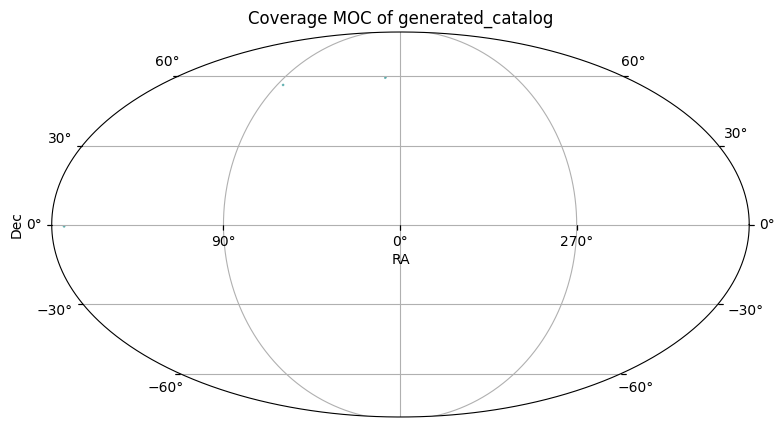

In [20]:
new_cat.plot_coverage()